### Bayesian Practice with wine quality Data set 



Data available at 

https://archive.ics.uci.edu/ml/datasets/Wine+Quality



In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [2]:
red_wine_raw = pd.read_csv("winequality-red.csv",sep = ';' )
red_wine_raw.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
red_wine_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


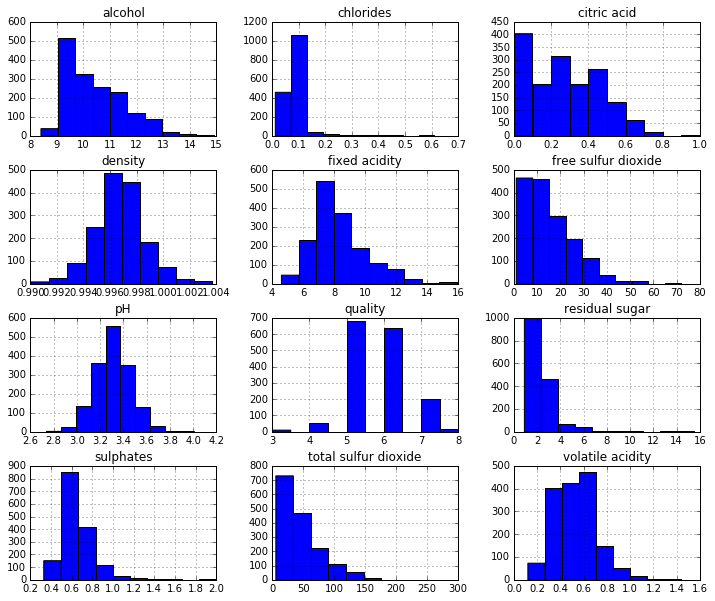

In [4]:
red_wine_raw.hist()
plt.show()

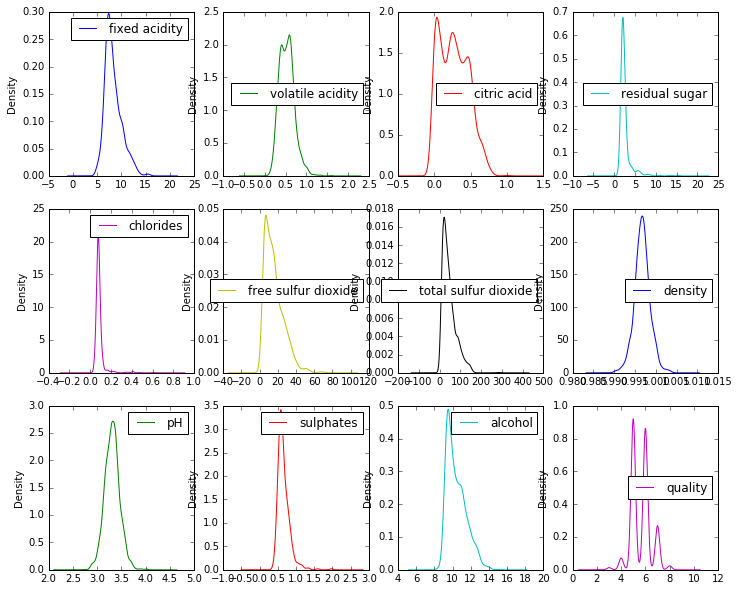

In [5]:
red_wine_raw.plot(kind = 'density',subplots = True, layout =(3,4), sharex = False )
plt.show()

## Pre processing 

We will start by turning finding the average wine quality ranking and making the categorical quality into a binary variable 

In [6]:
qual_mean = red_wine_raw["quality"].mean()
qual_count_low = red_wine_raw[red_wine_raw["quality"] < qual_mean].count()[1]
qual_count_high = red_wine_raw[red_wine_raw["quality"] > qual_mean].count()[1]

In [7]:
print("The average quality is ", qual_mean)
print("The number of low's are ", qual_count_low) 
print("The number of high's are ", qual_count_high)
print("The ratio of high to low's are ", qual_count_high/qual_count_low)

The average quality is  5.6360225140712945
The number of low's are  744
The number of high's are  855
The ratio of high to low's are  1.14919354839


Let's make the binary variable 

In [8]:
from sklearn.preprocessing import Binarizer

In [9]:
binarizer1 = Binarizer(threshold=qual_mean)
red_wine_raw["Quality_binary"] = binarizer1.transform(red_wine_raw["quality"]).transpose()

C:\Users\board\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [10]:
# Check 
red_wine_raw[red_wine_raw["Quality_binary"]==1].count()[1]

855

In [11]:
p_real = qual_count_high/(qual_count_high + qual_count_low)
p_real

0.53470919324577859

In [12]:
from pomegranate import * 

Prior distribtion of a bernoulli 

$$ N(\mu, \sigma^2) $$
$$ \mu = np  ;  \sigma^2 = np(1-p) $$ 

We know there are 1599 observations in our data set. 


I don't really have a strong opinion about p so I'll say it's about 50% or 0.5.
That is to say that there is an equal likely hood of any wine being above or below average. 

We can set our confidence then choose an $\hat{n}$ based on our confidence, let's call $C$
Once we choose $C$, we can solve 

$$ C = \frac{\hat{n}}{n} = \frac{\hat{n}}{1599} $$ 


For kicks lets set C as 0.5


In [28]:
# declare parameters 
C = 0.5 
p_hat = 0.1

In [29]:
mu_hat = p_hat 
sigma_hat = p_hat * (1 - p_hat)

print("mu_hat: ", mu_hat)
print("sigma_hat: ", sigma_hat)

mu_hat:  0.1
sigma_hat:  0.09000000000000001


In [30]:
mu_real = p_real * n
sigma_real = n * p_real * (1 - p_real)


Let's take a peak at the prior 

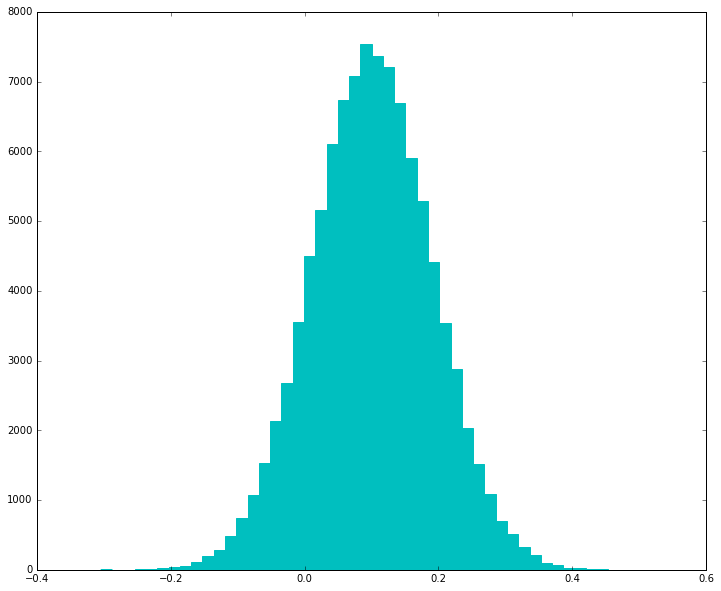

In [31]:
d = NormalDistribution(mu_hat, sigma_hat)
d.plot( n=100000, edgecolor='c', color='c', bins=50 )

In [32]:
d.fit(red_wine_raw["Quality_binary"], inertia = C)

In [33]:
print("Prior values: ", mu_hat, sigma_hat)
print ("Data values: ", mu_real/n, sigma_real/n)
print ("Updated Probabilities: ", d.parameters)


Prior values:  0.1 0.09000000000000001
Data values:  0.534709193246 0.248795271904
Updated Probabilities:  [0.3173545966228893, 0.29439690851343125]


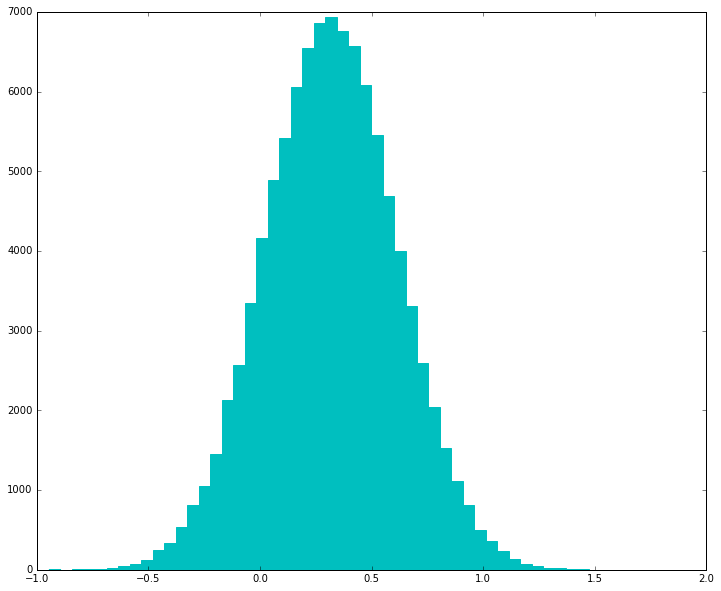

In [34]:
d.plot( n=100000, edgecolor='c', color='c', bins=50 )